In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_name="C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Datafiles\\Visadataset.csv"
visa_dataset=pd.read_csv(file_name)

In [4]:
wage_data= visa_dataset['prevailing_wage']
wage_data

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

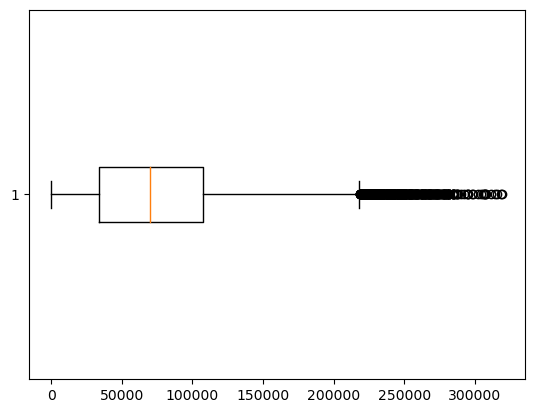

In [5]:
plt.boxplot(data,vert=False)
plt.show()

In [35]:
Q1=round(np.quantile(wage_data,0.25),2)
Q2=round(np.quantile(wage_data,0.50),2)
Q3=round(np.quantile(wage_data,0.75),2)
IQR=(Q3-Q1)
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR

con1=wage_data<LB
con2=wage_data>UB
con1|con2 
outliers_data=visa_dataset[con1|con2]


# Removing of outliers
con1=wage_data>LB
con2=wage_data<UB
non_outliers_data=visa_dataset[con1&con2]


In [19]:
non_outliers_data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


1. Remove the outliers

    <2=%  then remove the outliers
    98% of data will avalaibale , that is enough to train the data

2. Fill the outliers

    outliers will be affected by mean value
    so fill outliers with Medain value

    Outliers can cap with >Q3 value with Q3
    
                          <Q1 value with Q1

In [8]:
len(outliers_data)

427

In [10]:
(len(outliers_data)/len(visa_dataset))*100

1.6758241758241759

In [11]:
427/25480

0.016758241758241758

#### Fill the outliers with medain values

In [22]:
#visa_dataset= 25480
#outliers_data=427
#not_outliers_data=25480-427= 25053

**Fill outliers data with Median values**

- Step-1: Fill ouliers data with median value
    
- Step-2: Merge two data frames non outliers data and outliers data

In [ ]:
visa_dataset['prevailing_wage']

# We seperated non outliers data(25053) and outliers data(427)
# Fill the prevailing_wage values of outliers data(427) with medain original dataset
# Then combine both non outliers data(25053) and filled outliers data(427)===> 25480

In [ ]:
# Will iterate prevailing_wage values of original visa dataset (25480)
20000 ---------- present in your oulier data , that value replace with median

In [36]:
median_wage=visa_dataset['prevailing_wage'].median()
median_wage

original_wage=visa_dataset['prevailing_wage'].to_list()
original_wage[:10] # 25480

outlier_wage=outliers_data['prevailing_wage'].to_list()
len(outlier_wage)

427

In [38]:
#outlier_wage # Paste your screenshot in wahtsapp

**Impute Outliers with median** 

**np.where**

In [ ]:
if <condition>:
    # st1
    # st2

else:
    # st1
    
np.where(<condition>,a,b)

In [ ]:
outliers<lb,median,same
outlier>ub

In [42]:
Q1=round(np.quantile(wage_data,0.25),2)
Q2=round(np.quantile(wage_data,0.50),2)
Q3=round(np.quantile(wage_data,0.75),2)
IQR=(Q3-Q1)
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR

visa_dataset[visa_dataset['prevailing_wage']>UB]

con=visa_dataset['prevailing_wage']>UB
median=visa_dataset['prevailing_wage'].median()

np.where(con,median,visa_dataset['prevailing_wage'])


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [64]:
l1=[1,2,3]
l2=['A','B','C']
df=pd.DataFrame(zip(l1,l2),
               columns=['Col1','Col2'])
df

,Col1,Col2
0,1,A
1,2,B
2,3,C


In [67]:
con=df['Col1']>2

df['Col1']=np.where(con,100,df['Col1'])

In [68]:
df

,Col1,Col2
0,1,A
1,2,B
2,100,C


In [62]:
df['Col2']=='A'

0     True
1    False
2    False
Name: Col2, dtype: bool

In [ ]:
con=df1['col1']>2    # Str(col1) is not compare with int(2)

df1['col1']=np.where(con,100,df1['col1'])

In [ ]:
median=visa_dataset['prevailing_wage'].median()

cond=visa_dataset['prevailing_wage']>UB

visa_dataset['prevailing_wage']=np.where(cond,median,visa_dataset['prevailing_wage'])

visa_dataset

In [ ]:
visa_dataset['prevailing_wage'] = np.where(con2, 
                                           visa_dataset['prevailing_wage'].median(), 
                                           visa_dataset['prevailing_wage'])

In [ ]:
con1=visa_dataset['prevailing_wage']>UB
median_wage=visa_dataset['prevailing_wage'].median()
visa_dataset['prevailing_wage']=np.where(con1,median_wage,visa_dataset['prevailing_wage'])visa_dataset

In [ ]:
md=visa_dataset['prevailing_wage'].median()
con1=visa_dataset['prevailing_wage']>UB
visa_dataset['prevailing_wage']=np.where(con1,md,visa_dataset['prevailing_wage'])
visa_dataset